# Trabajo Práctico número 1

## Carga de utilities

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

from utilities.graficos import graficar_imagen_e_histograma, graficar_2_histogramas

## Parte 2

1. Para las imágenes *img1_tp.png* y *img2_tp.png* leerlas con OpenCV en escala de grisas y visualizarlas. 
1. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como *features* a los histogramas?

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Carga y visualización de imágenes con sus histogramas

In [3]:
img1_path = "./material/img1_tp.png"
img2_path = "./material/img2_tp.png"

In [4]:
img1 = cv.imread(img1_path, cv.IMREAD_GRAYSCALE)
img2 = cv.imread(img2_path, cv.IMREAD_GRAYSCALE)

In [13]:
print(f"Tamaño de la imagen 1: {img1.shape}")
print(f"Tamaño de la imagen 2: {img2.shape}")

Tamaño de la imagen 1: (288, 287)
Tamaño de la imagen 2: (288, 287)


A continuación, se grafica la imagen 1 y su histograma, utilizando *256* bins:

In [5]:
hist_img1, bins_img1 = np.histogram(img1.ravel(), 256, [0, 256])

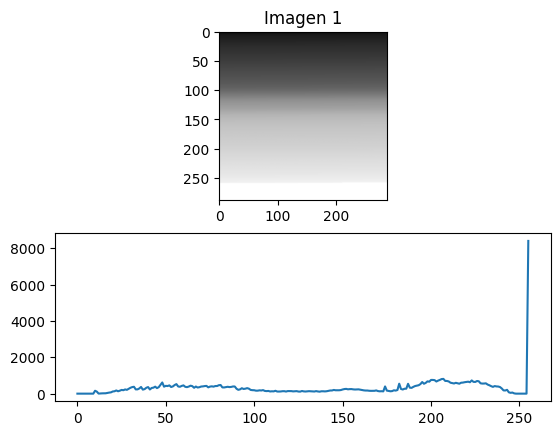

In [6]:
graficar_imagen_e_histograma(imagen=img1, histograma=hist_img1, cmap='gray', vmin=0, vmax=255, title="Imagen 1")

A continuación, se grafica la imagen 2 y su histograma, utilizando *256* bins:

In [7]:
hist_img2, bins_img2 = np.histogram(img2.ravel(), 256, [0, 256])

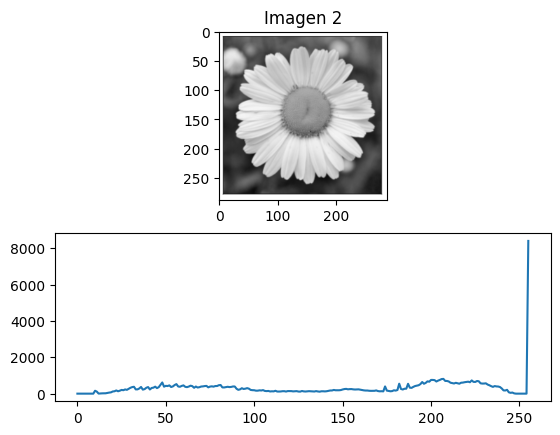

In [8]:
graficar_imagen_e_histograma(imagen=img2, histograma=hist_img2, cmap='gray', vmin=0, vmax=255, title="Imagen 2")

### Comparación de histogramas

A simple vista, los histogramas de las imágenes 1 y 2, utilizando *256* bins, parecen ser similares.

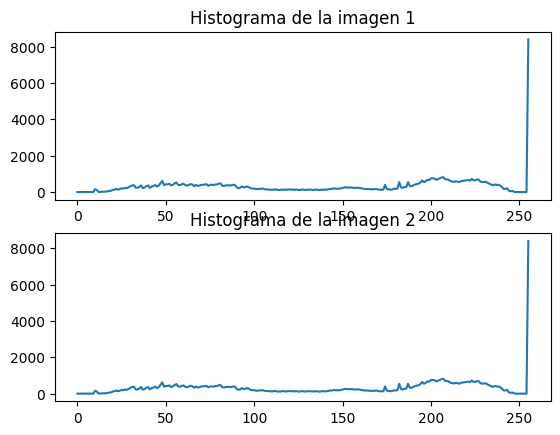

In [9]:
graficar_2_histogramas(histograma1=hist_img1, histograma2=hist_img2, title1="Histograma de la imagen 1", title2="Histograma de la imagen 2")

Para corroborar de manera analítica que se tratan de los mismos histogramas, se utilizará la función [compareHist](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gaf4190090efa5c47cb367cf97a9a519bd) de *OpenCV* con las siguientes métricas:

- ***Correlación*** ([HISTCMP_CORREL](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gga994f53817d621e2e4228fc646342d386a38c6d2cb4ae572e00aebd5642fae2add)): devuelve un valor entre $0$ y $1$. A mayor valor, mayor similitud entre histogramas.
- ***Chi-cuadrado*** ([HISTCMP_CHISQR](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gga994f53817d621e2e4228fc646342d386aa88d6751fb2bb79e07aa8c8717fda881)): implementa la distancia de *Chi-Square*. A menor valor, mayor similitud entre histogramas ($0$ para histogramas idénticos).
- ***Bhattacharyya*** ([HISTCMP_BHATTACHARYYA](https://docs.opencv.org/4.x/d6/dc7/group__imgproc__hist.html#gga994f53817d621e2e4228fc646342d386ad75f6e8385d2e29479cf61ba87b57450)): calcula la distancia de *Bhattacharyya*. A menor valor, mayor similitud entre histogramas ($0$ para histogramas idénticos).

***Fuentes***:
- [OpenCV - Histograms](https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html).
- [OpenCV - Histogram comparison](https://docs.opencv.org/4.x/d8/dc8/tutorial_histogram_comparison.html#autotoc_md612).

In [ ]:
# Aseguro que el tipo sea float 32.
h1 = hist_img1.astype(np.float32)
h2 = hist_img2.astype(np.float32)

corr = cv.compareHist(h1, h2, cv.HISTCMP_CORREL)
chi2 = cv.compareHist(h1, h2, cv.HISTCMP_CHISQR)
bhat = cv.compareHist(h1, h2, cv.HISTCMP_BHATTACHARYYA)

print(f"""Comparación de Histogramas:
      \tCorrelación:                {corr}
      \tDistancia Chi-Square:       {chi2}
      \tDistancia de Bhattacharyya: {bhat}
""")

Comparación de Histogramas:
      	Correlación:                1.0
      	Distancia Chi-Square:       0.0
      	Distancia de Bhattacharyya: 0.0



Estos son los resultados obtenidos al comparar ambos histogramas mediante diferentes métricas:

- ***Correlación***: $1$, lo cual indica que los histogramas son idénticos.
- ***Chi-cuadrado***: $0$, lo cual indica que los histogramas son idénticos.
- ***Bhattacharyya***: $0$, lo cual indica que los histogramas son idénticos.

Es decir, los histogramas de las imágenes $1$ y $2$ son idénticos.